<a href="https://colab.research.google.com/github/mini-u/BasicDL/blob/main/%5B2023_10_11_%EC%98%A4%ED%9B%84_2_19_31%5D_0_%EC%9C%A0%EC%84%B1%EB%AF%BC_%EC%8B%A4%EC%8A%B5%EB%A6%AC%ED%8F%AC%ED%8A%B85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 실습리포트5



*   이름: 유성민
*   학과: 생명환경공학전공
*   학번: 2019110881

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import Sequential
from keras.layers import Dense


### 귀뚜라미 온도계

- 문제: 귀뚜라미 울음소리와 기온과의 상관관계를 구하기 위한 선형회귀 신경망 모델을 정의하고 관계식을 구하라. epoch별 오차값과 훈련 데이터와 회귀식을 시각화하라.

- 실행결과: 가중치가 1.418030, 편향이 3.108034인 선형 회귀식을 얻을 수 있었다. epoch가 늘어남에 따라 줄어드는 오차값을 확인할 수 있었다.


In [ ]:
#엑셀파일 read
df_cricket = pd.DataFrame(pd.read_excel("/content/cricket.xlsx"))
df_cricket.head()

,X,Y
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
#행, 열값 변경 및 섭씨온도 행 추가
df_cricket.rename(columns={"X": "cricket chirps"}, inplace=True)
df_cricket.rename(columns={"Y": "Temperature(℉)"}, inplace=True)

df_cricket['Temperature(℃)'] = (df_cricket["Temperature(℉)"]-32)*5/9
df_cricket.head()

,cricket chirps,Temperature(℉),Temperature(℃)
0,20.0,88.6,31.444444
1,16.0,71.6,22.000000
2,19.8,93.3,34.055556
3,18.4,84.3,29.055556
4,17.1,80.6,27.000000


<Axes: xlabel='cricket chirps', ylabel='Temperature(℃)'>

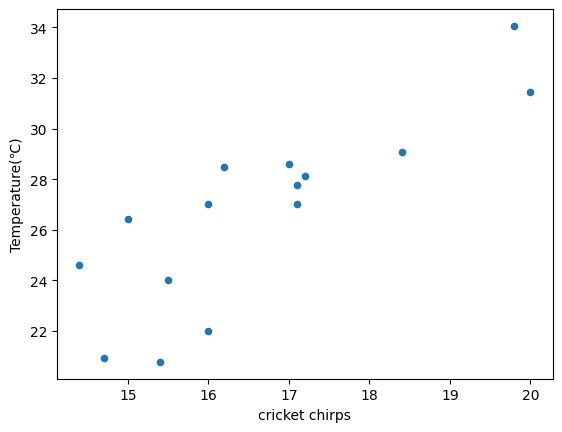

In [ ]:
#훈련데이터 시각화
df_cricket.plot.scatter('cricket chirps','Temperature(℃)')

In [ ]:
#x, y 데이터 넘파이 배열로 가져오기
xs=df_cricket[df_cricket.columns[0]].to_numpy()
ys=df_cricket[df_cricket.columns[2]].to_numpy()

In [ ]:
# 신경망 모델 정의
model=Sequential([
    Dense(1, input_shape=(1,), activation='linear') #노드가 하나인 선형회귀문제
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#모델 컴파일
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss='mean_squared_error')
history=model.fit(xs, ys, epochs=1000, verbose=1)

Epoch 1/1000
1/1 [==============================] - 1s 584ms/step - loss: 3083.1375
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 3063.4937
Epoch 3/1000
1/1 [==============================] - 0s 11ms/step - loss: 3043.9146
Epoch 4/1000
1/1 [==============================] - 0s 13ms/step - loss: 3024.4011
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 3004.9539
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 2985.5752
Epoch 7/1000
1/1 [==============================] - 0s 10ms/step - loss: 2966.2646
Epoch 8/1000
1/1 [==============================] - 0s 16ms/step - loss: 2947.0242
Epoch 9/1000
1/1 [==============================] - 0s 14ms/step - loss: 2927.8542
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 2908.7561
Epoch 11/1000
1/1 [==============================] - 0s 14ms/step - loss: 2889.7307
Epoch 12/1000
1/1 [==============================] - 0s 9ms/step - loss: 2870.7791
Epo

In [ ]:
#가중치와 편향 구하기
w, b = model.get_weights()
print(w, b)

[[1.4180309]] [3.108034]


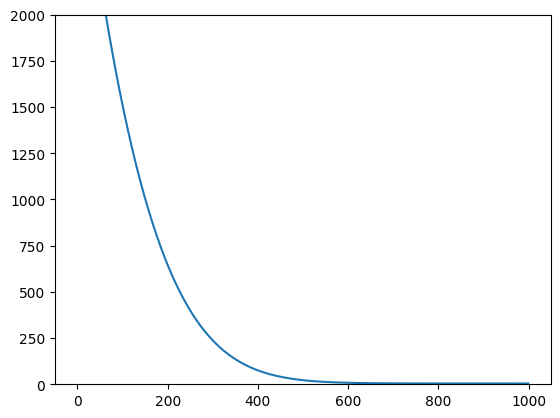

In [ ]:
#손실오차 확인
loss=history.history['loss']
plt.plot(loss)
plt.ylim(0,2000)
plt.show()

1/1 [==============================] - 0s 21ms/step


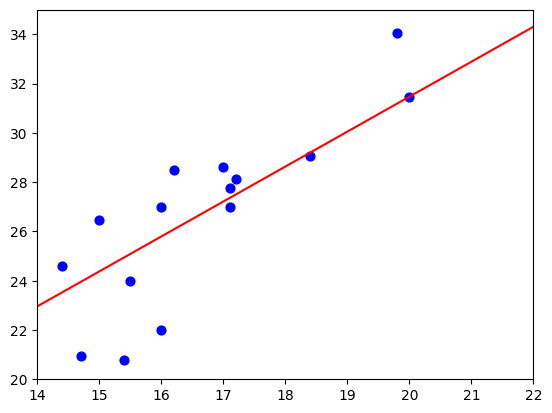

In [ ]:
#회귀식 확인
x=np.array([14, 22])
y=model.predict(x)

plt.scatter(xs,ys,c='blue', s=40)
plt.plot(x,y, c='red')
plt.axis([14,22,20,35])
plt.show()